[1 0 1 3 9 3 1 7 1 3 3 3 3 3 0 1 3 4 2 3 3 3 1 1 1 9 0 1 7 1 3 1 3 2 3] 2000
[0 0 6 9 9 8 0 2 1 3 1 4 3 0 2 4 1 8 0 4 0 0 1 7 2 7 3 7 4 0 5 8 6 9 7] 2000




[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...


/Users/takashimac/Documents/Python/Meta/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/takashimac/Documents/Python/Meta/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2000 samples in 0.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 673.217478
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.132568
[t-SNE] KL divergence after 300 iterations: 1.479762
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000


/Users/takashimac/Documents/Python/Meta/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/takashimac/Documents/Python/Meta/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.090614
[t-SNE] KL divergence after 300 iterations: 0.539437


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

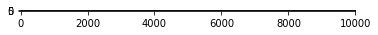

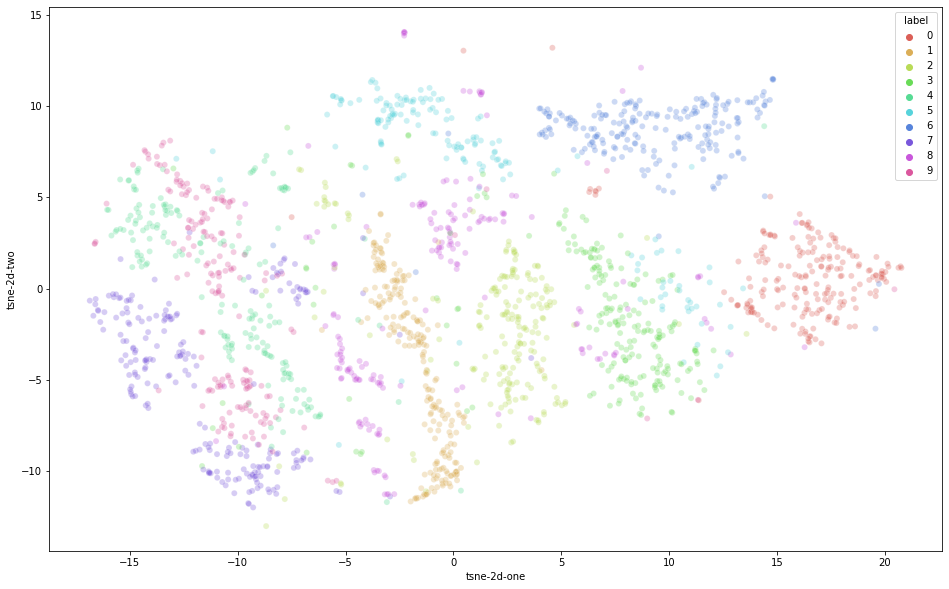

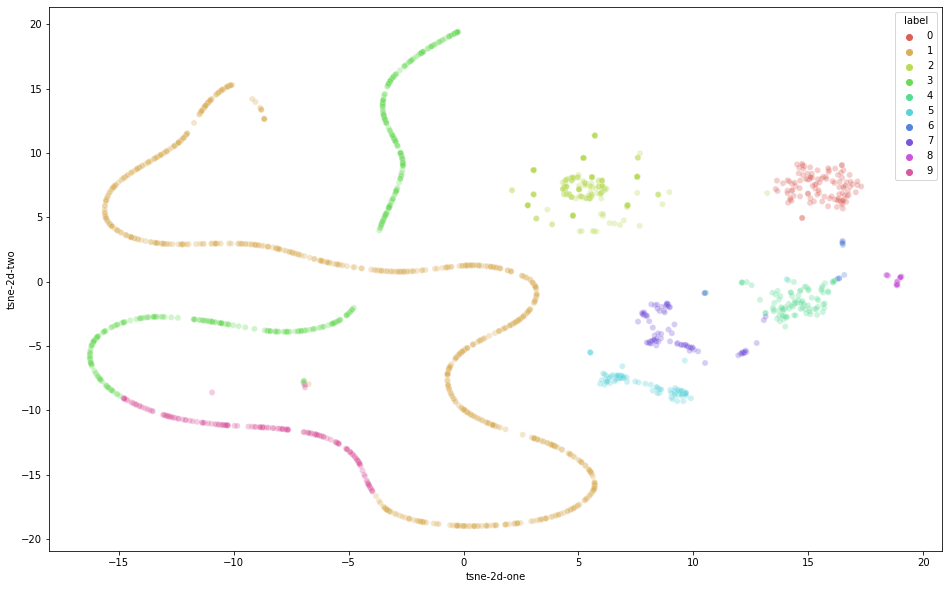

In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

START = 8000
END = 10000
DIFF = END - START

df = pd.read_csv("../export/network/20211024_232932_10000_784_inhibit_neighbour_neurons_mnist_network/Output Layer.csv")
plt.imshow(df.to_numpy())
df = df.T
df = df[START:END]

mnist_data = np.load('../import/mnist.npz')
x_train = mnist_data["x_train"].reshape(60000, 784)[START:END]
y_train = mnist_data["y_train"][START:END]

df_mnist = pd.DataFrame(x_train)
# df_mnist["label"] = y_train

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label[DIFF-35:DIFF], len(label))

print(y_train[DIFF-35:DIFF], len(y_train))
print("\n\n\n")

df_without_label = df
df["label"] = label
df
df_without_label = df.drop(columns=["label"])

# filtered_label2 = df[df["label"] == 2]
# filtered_label2

df_without_label
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



## PCA

# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(df_without_label)
# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1]
# df['pca-three'] = pca_result[:,2]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     hue="label",
#     palette=sns.color_palette("hls", 10),
#     data=df,
#     legend="full",
#     alpha=0.3
# )



# Plot MNIST t-SNE or PCA

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_mnist)

df_mnist['tsne-2d-one'] = tsne_results[:,0]
df_mnist['tsne-2d-two'] = tsne_results[:,1]

df_mnist["label"] = y_train
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_mnist,
    legend="full",
    alpha=0.3
)

## Neuron TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_without_label)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)


# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(df_mnist)
# df_mnist['pca-one'] = pca_result[:,0]
# df_mnist['pca-two'] = pca_result[:,1] 
# df_mnist['pca-three'] = pca_result[:,2]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# df_mnist["label"] = y_train
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     hue="label",
#     palette=sns.color_palette("hls", 10),
#     data=df_mnist,
#     legend="full",
#     alpha=0.3
# )
